In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeClassifier, Lasso, ElasticNetCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
from urllib.parse import urlparse
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [244]:
ds = pd.read_csv('./GB_dataset.csv')
ds.head()

,session_id,claim,60sec,scroll_90,hit_date,referer_url,url,utm_source,utm_medium,gender,age,touch_screen,has_vk_id,has_ok_id
0,4358a11f0d16be6e,0,0,1,2021-12-01,https://gb.ru/education,https://gb.ru/comms/calendar,NaN,NaN,0,39,1,1,0
1,133509b7ff9a586c,0,0,0,2021-12-01,https://www.google.com/,https://gb.ru/courses/programming,google,cpc,-1,-1,2,0,0
2,8b23cd36f2b08dcd,0,0,0,2021-12-01,https://gb.ru/tests/352/trials/2238911/run,https://gb.ru/tests/352/trials/2238911,NaN,NaN,1,49,1,1,1
3,50de4c060fd128f3,0,1,1,2021-12-01,https://gb.ru/courses/1165,https://gb.ru/a/a1,NaN,NaN,-1,-1,1,1,0
4,c2ca3cc9a67c749b,0,0,0,2021-12-01,NaN,https://gb.ru/login,NaN,NaN,0,23,2,1,0


In [245]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884407 entries, 0 to 884406
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   session_id    884407 non-null  object
 1   claim         884407 non-null  int64 
 2   60sec         884407 non-null  int64 
 3   scroll_90     884407 non-null  int64 
 4   hit_date      884407 non-null  object
 5   referer_url   687598 non-null  object
 6   url           884407 non-null  object
 7   utm_source    245184 non-null  object
 8   utm_medium    244863 non-null  object
 9   gender        884407 non-null  int64 
 10  age           884407 non-null  int64 
 11  touch_screen  884407 non-null  int64 
 12  has_vk_id     884407 non-null  int64 
 13  has_ok_id     884407 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 94.5+ MB


In [246]:
ds.describe()

,claim,60sec,scroll_90,gender,age,touch_screen,has_vk_id,has_ok_id
count,884407.000000,884407.000000,884407.000000,884407.000000,884407.000000,884407.000000,884407.000000,884407.000000
mean,0.002071,0.313425,0.144197,-0.359456,14.844552,1.436307,0.449500,0.124044
std,0.045466,0.463886,0.351290,0.808853,21.505421,0.495927,0.497444,0.329631
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,29.000000,2.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,120.000000,2.000000,1.000000,1.000000


In [247]:
print('Количество уникальных сессий: ', ds['session_id'].nunique())
print('Всего сессии: ',ds['session_id'].count())

Количество уникальных сессий:  864092
Всего сессии:  884407


In [248]:
# ds.groupby('session_id')

ds['sessions'] = 1
group = ds.groupby('session_id', as_index=False).agg(sessions=('sessions','count'))
ds = ds.sort_values('hit_date', ascending=False).drop_duplicates('session_id', keep='last')
ds = ds.merge(group, on=['session_id'], how='inner')
print('Количество уникальных сессий: ', ds['session_id'].nunique())
print('Всего сессии: ',ds['session_id'].count())


Количество уникальных сессий:  864092
Всего сессии:  864092


In [249]:
ds.head()

,session_id,claim,60sec,scroll_90,hit_date,referer_url,url,utm_source,utm_medium,gender,age,touch_screen,has_vk_id,has_ok_id,sessions_x,sessions_y
0,79eac7d1eb14c8b9,0,1,0,2021-12-04,https://gb.ru/search,https://gb.ru/posts/learn_django,NaN,NaN,-1,-1,2,0,0,1,1
1,c67814d4f764f944,0,1,0,2021-12-04,https://gb.ru/courses/all,https://gb.ru/courses/70,NaN,NaN,-1,-1,1,0,0,1,1
2,647fcb37e636047b,0,1,1,2021-12-04,https://l.geekbrains.ru/,https://gb.ru/profportal/personal,NaN,NaN,1,17,2,1,0,1,1
3,8a82ec90ae82dbe4,0,0,0,2021-12-04,https://gb.ru/,https://gb.ru/education,NaN,NaN,0,41,1,1,0,1,1
4,cc26d61185ee7a9c,0,1,0,2021-12-04,https://gb.ru/,https://gb.ru/,NaN,NaN,-1,-1,1,0,0,1,1


In [250]:
# Данных немного мало, попробуем извлечь дополнительные параметры из ссылки
ds['is_curse_page'] = np.where(ds['url'].astype(str).str.contains("cource"), 1, 0)
ds['is_tests_page'] = np.where(ds['url'].astype(str).str.contains('tests'), 1, 0)
ds['is_education_page'] = np.where(ds['url'].astype(str).str.contains('education'), 1, 0)
ds['path'] = ds['url'].apply(lambda x: x.rsplit('/',2)[1])
ds['hit_month'] = ds['hit_date'].apply(lambda x: x.split('-')[1])
ds.head()

,session_id,claim,60sec,scroll_90,hit_date,referer_url,url,utm_source,utm_medium,gender,...,touch_screen,has_vk_id,has_ok_id,sessions_x,sessions_y,is_curse_page,is_tests_page,is_education_page,path,hit_month
0,79eac7d1eb14c8b9,0,1,0,2021-12-04,https://gb.ru/search,https://gb.ru/posts/learn_django,NaN,NaN,-1,...,2,0,0,1,1,0,0,0,posts,12
1,c67814d4f764f944,0,1,0,2021-12-04,https://gb.ru/courses/all,https://gb.ru/courses/70,NaN,NaN,-1,...,1,0,0,1,1,0,0,0,courses,12
2,647fcb37e636047b,0,1,1,2021-12-04,https://l.geekbrains.ru/,https://gb.ru/profportal/personal,NaN,NaN,1,...,2,1,0,1,1,0,0,0,profportal,12
3,8a82ec90ae82dbe4,0,0,0,2021-12-04,https://gb.ru/,https://gb.ru/education,NaN,NaN,0,...,1,1,0,1,1,0,0,1,gb.ru,12
4,cc26d61185ee7a9c,0,1,0,2021-12-04,https://gb.ru/,https://gb.ru/,NaN,NaN,-1,...,1,0,0,1,1,0,0,0,gb.ru,12


In [251]:
# удалим ид сессии и дату
ds = ds.drop(['session_id', 'hit_date', 'utm_medium', 'utm_source','sessions_x'], axis=1)
# заменим ссылки на домены
# ds['referer_url'] = ds['referer_url'].apply(lambda x: urlparse(str(x)).netloc)
# ds['url'] = ds['url'].apply(lambda x: urlparse(str(x)).netloc)
ds = ds.drop(['referer_url','url'], axis=1)
ds.head()

,claim,60sec,scroll_90,gender,age,touch_screen,has_vk_id,has_ok_id,sessions_y,is_curse_page,is_tests_page,is_education_page,path,hit_month
0,0,1,0,-1,-1,2,0,0,1,0,0,0,posts,12
1,0,1,0,-1,-1,1,0,0,1,0,0,0,courses,12
2,0,1,1,1,17,2,1,0,1,0,0,0,profportal,12
3,0,0,0,0,41,1,1,0,1,0,0,1,gb.ru,12
4,0,1,0,-1,-1,1,0,0,1,0,0,0,gb.ru,12


<AxesSubplot:xlabel='age'>

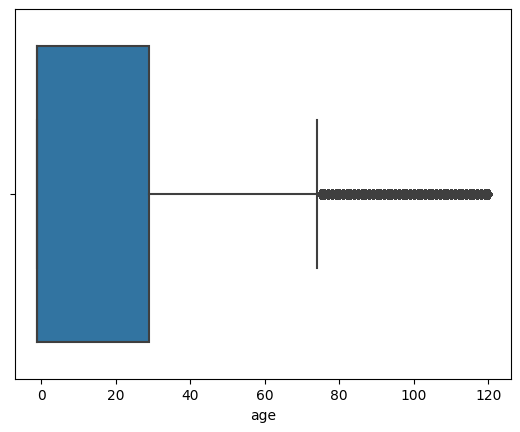

In [252]:
sns.boxplot(ds['age'])

In [253]:
np.where(ds['age']>75)

(array([   117,    175,    261, ..., 863920, 863939, 864011]),)

In [254]:
ds['age'] = ds['age'].apply(lambda x: -1 if x > 75 else x)
# ds = ds.loc[ds['age']!=-1]
# ds = ds.loc[ds['gender']!=-1]
# ds.head()

In [255]:
le_url = preprocessing.LabelEncoder()
ds['path'] = le_url.fit_transform(ds['path'])

<AxesSubplot:>

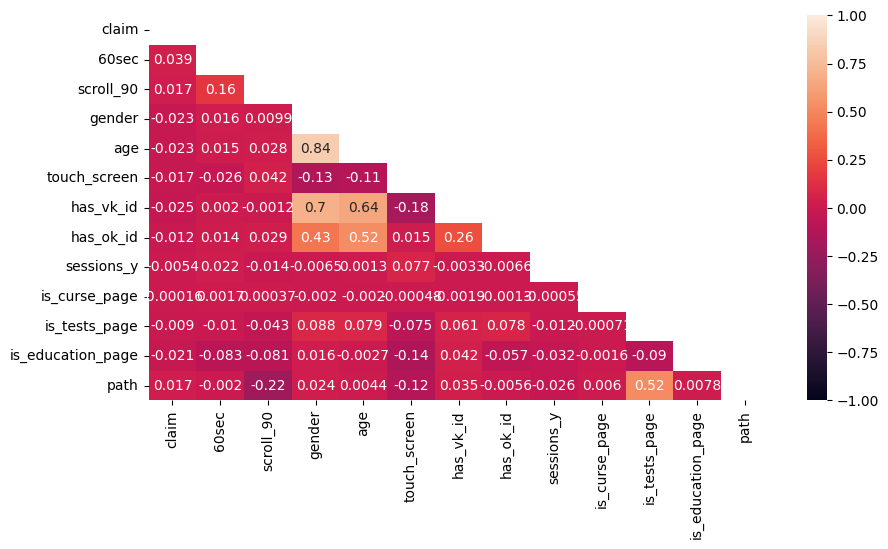

In [256]:
cor_matrix_mask = np.triu(np.ones_like(ds.corr(), dtype=bool))
plt.figure(figsize=(10, 5))
sns.heatmap(ds.corr(), vmin=-1, vmax=1, annot=True, mask=cor_matrix_mask)

In [257]:
y = ds['claim']
X = ds.drop(['claim'], axis=1)
# разеление выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
pd.value_counts(y.values.ravel())

0    862269
1      1823
dtype: int64

In [258]:
# LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predict_test = model.predict(X_test)
predict_train = model.predict(X_train)

In [259]:
pd.DataFrame(zip(X.columns, model.coef_), columns=['feature', 'weight'])

,feature,weight
0,60sec,0.003399
1,scroll_90,0.002322
2,gender,-0.000274
3,age,-0.000021
4,touch_screen,-0.002136
5,has_vk_id,-0.001681
6,has_ok_id,-0.000165
7,sessions_y,-0.001339
8,is_curse_page,-0.008090
9,is_tests_page,-0.006527


In [260]:

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
mse = mean_squared_error(y_test, predict_test)
rmse = mean_squared_error(y_test, predict_test, squared=False)
r2 = r2_score(y_test, predict_test)
# act = accuracy_score(y_test, predict_test)
print(
    f'MSE:{round(mse, 5)}\n'
    f'R2:{round(r2, 5)}\n'
    f'RMSE:{round(rmse, 5)}\n'
)

MSE:0.002
R2:0.00345
RMSE:0.04475



Модель линейнейной регрессии не годится для предсказания отправки формы , попробуем другие.

RidgeClassifier
----------
accuracy:   0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172471
           1       0.00      0.00      0.00       348

    accuracy                           1.00    172819
   macro avg       0.50      0.50      0.50    172819
weighted avg       1.00      1.00      1.00    172819



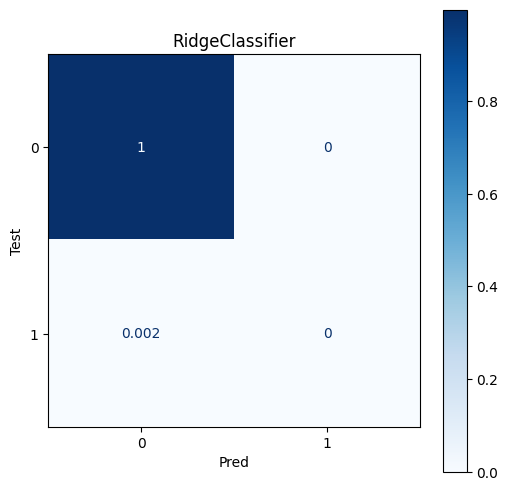

----------
LogisticRegression
----------
accuracy:   0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172471
           1       0.00      0.00      0.00       348

    accuracy                           1.00    172819
   macro avg       0.50      0.50      0.50    172819
weighted avg       1.00      1.00      1.00    172819



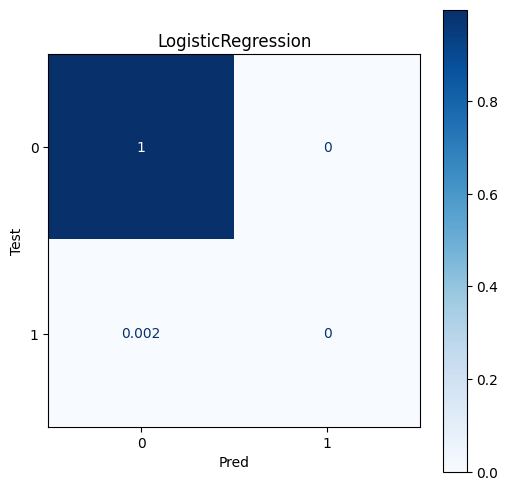

----------
RandomForestClassifier
----------
accuracy:   0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172471
           1       0.17      0.00      0.01       348

    accuracy                           1.00    172819
   macro avg       0.58      0.50      0.50    172819
weighted avg       1.00      1.00      1.00    172819



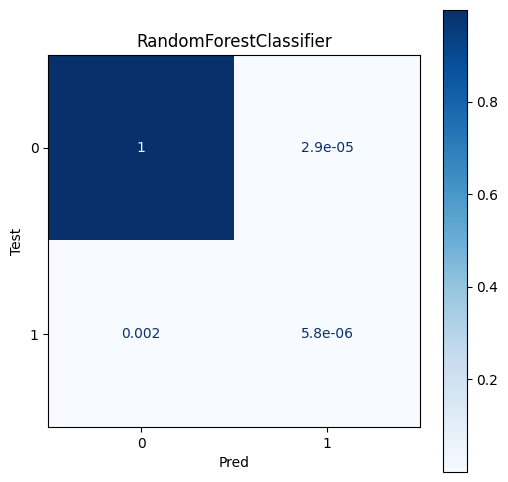

----------


In [261]:
for model in [
    RidgeClassifier(random_state=41),
    LogisticRegression(random_state=41),
    RandomForestClassifier(random_state=41)
]:
    print(type(model).__name__)
    print('-'*10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"accuracy:   {round(accuracy_score(y_test, y_pred),3)}")
    print(classification_report(y_test, y_pred))
    fig, ax = plt.subplots(figsize=(6,6))
    plot_confusion_matrix(model, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize='all')
    ax.set(xlabel='Pred', ylabel='Test', title=type(model).__name__)
    plt.show()
    print('-'*10)

Как то слишком хорошо чтоб быть правдой, но модели классификации справляются явно лучше с поставленной задачей чем линейная регрессия
Или просто если предсказывать 0, то ошибешься с очень малой вероятностью